#HW1-3:Generation

Fit network with random labels

Compare number of parameters vs generalization

Compare flatness vs generalization

In [ ]:
# fit network with random labels
%tensorflow_version 1.x 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA
tf.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# data preparation
data = input_data.read_data_sets('data/MNIST/', one_hot=True);
train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10
print("Training Dataset Size:",train_num)
print("Validation Dataset Size:",valid_num)
print("Testing Dataset Size:",test_num)

# model architecture
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

m1_conv1 = tf.layers.conv2d(inputs=input_x,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv1')
m1_pool1 = tf.layers.max_pooling2d(inputs=m1_conv1,pool_size=2,strides=2)
m1_conv2 = tf.layers.conv2d(inputs=m1_pool1,filters=36,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv2')
m1_pool2 = tf.layers.max_pooling2d(inputs=m1_conv2,pool_size=2,strides=2)
m1_flat1 = tf.layers.flatten(m1_pool2)
m1_fc1 = tf.layers.dense(inputs=m1_flat1,units=128,activation=tf.nn.relu, name='layer_fc1')
m1_logits = tf.layers.dense(inputs=m1_fc1,units=num_classes,activation=None, name='layer_fc_out')


# Cross Entropy Loss
m1_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m1_logits);
m1_loss = tf.reduce_mean(m1_cross_entropy);

# Accuracy
m1_softmax = tf.nn.softmax(logits=m1_logits);
m1_pred_op = tf.argmax(m1_softmax,dimension=1);
m1_acc_op = tf.reduce_mean(tf.cast(tf.equal(m1_pred_op, y_cls), tf.float32));

# Optimizer and Training Operation
m1_optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
m1_train_op = m1_optimizer.minimize(m1_loss)


x_train = data.train.images
y_train = data.train.labels
np.random.shuffle(y_train)
y_train.shape

def createBatches(train_x,train_y,batch_size):
    mini_batches = []
    data_num = train_x.shape[0]
    idx = np.arange(data_num)
    np.random.shuffle(idx)
    train_x = train_x[idx]
    train_y = train_y[idx]
    for i in range(0,data_num-batch_size,batch_size):
        x = train_x[i:i+batch_size]
        y = train_y[i:i+batch_size]
        mini_batches.append((x,y))
    if data_num % batch_size != 0:
        x = train_x[i+batch_size:data_num]
        y = train_y[i+batch_size:data_num]
        mini_batches.append((x,y))
    return mini_batches

session = tf.Session() 
session.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 250
BATCH_SIZE = 256
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for i in range(EPOCH):
    batches = createBatches(x_train,y_train,BATCH_SIZE)
    for batch in batches:
        x_batch, y_true_batch = batch
        session.run(m1_train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([m1_loss,m1_acc_op], feed_dict={x: x_batch,y: y_true_batch})
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss, test_acc = session.run([m1_loss,m1_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if i%5 == 0:
        print("Epoch: ",i,"Train Loss: ",train_loss,"Test Loss: ",test_loss,"Test acc: ",test_acc)



Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Training Dataset Size: 55000
Validation Dataset Size: 5000
Testing Dataset Size: 10000
Epoch:  0 Train Loss:  2.315037 Test Loss:  2.3108466 Test acc:  0.115
Epoch:  5 Train Loss:  2.2982209 Test Loss:  2.3152058 Test acc:  0.1205
Epoch:  10 Train Loss:  2.2807348 Test Loss:  2.3235674 Test acc:  0.0711
Epoch:  15 Train Loss:  2.2966294 Test Loss:  2.3239217 Test acc:  0.0931
Epoch:  20 Train Loss:  2.2412653 Test Loss:  2.34492 Test acc:  0.0835
Epoch:  25 Train Loss:  2.2282746 Test Loss:  2.3589215 Test acc:  0.091
Epoch:  30 Train Loss:  2.2283497 Test Loss:  2.3509703 Test acc:  0.0993
Epoch:  35 Train Loss:  2.2146022 Test Loss:  2.3902895 Test acc:  0.0952
Epoch:  40 Train Loss:  2.1588287 Test Loss:  2.3576806 Test acc:  0.1134
Epoch:  45 Train Loss:  2.1703174 Test Loss:  2.4116507 Test

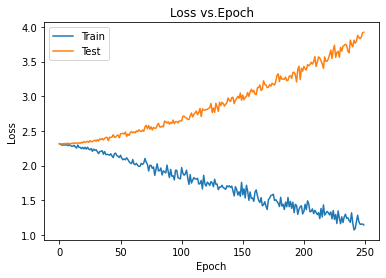

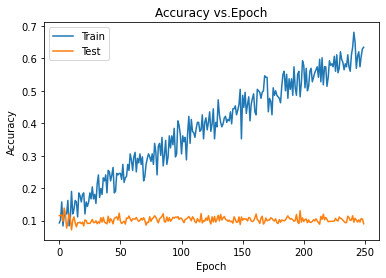

In [ ]:
# result visualization
plt.plot(np.arange(0,EPOCH),train_loss_list)
plt.plot(np.arange(0,EPOCH),test_loss_list)
plt.legend(['Train','Test'])
plt.title("Loss vs.Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.plot(np.arange(0,EPOCH),train_acc_list)
plt.plot(np.arange(0,EPOCH),test_acc_list)
plt.title("Accuracy vs.Epoch")
plt.legend(['Train','Test'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()